In [5]:
import numpy as np
import pandas as pd

# Fonction pour générer un triangle de dommages auto avec la loi de Poisson
def generate_auto_claim_triangle(num_years, average_claim_rate):
    triangle = np.zeros((num_years, num_years))

    for i in range(num_years):
        claims_in_year = np.random.poisson(average_claim_rate)
        triangle[i, :num_years - i] = claims_in_year

    df = pd.DataFrame(triangle, columns=[f'Year {i + 1}' for i in range(num_years)])
    return df

# Exemple d'utilisation
num_years = 10
average_claim_rate = 200  # Ajustez selon vos besoins

auto_claim_triangle = generate_auto_claim_triangle(num_years, average_claim_rate)
print(auto_claim_triangle)


   Year 1  Year 2  Year 3  Year 4  Year 5  Year 6  Year 7  Year 8  Year 9  \
0   213.0   213.0   213.0   213.0   213.0   213.0   213.0   213.0   213.0   
1   201.0   201.0   201.0   201.0   201.0   201.0   201.0   201.0   201.0   
2   167.0   167.0   167.0   167.0   167.0   167.0   167.0   167.0     0.0   
3   185.0   185.0   185.0   185.0   185.0   185.0   185.0     0.0     0.0   
4   214.0   214.0   214.0   214.0   214.0   214.0     0.0     0.0     0.0   
5   178.0   178.0   178.0   178.0   178.0     0.0     0.0     0.0     0.0   
6   198.0   198.0   198.0   198.0     0.0     0.0     0.0     0.0     0.0   
7   200.0   200.0   200.0     0.0     0.0     0.0     0.0     0.0     0.0   
8   223.0   223.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9   207.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   Year 10  
0    213.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0  
5      0.0  
6      0.0  
7      0.0  
8      0.0  
9      0.0  


In [6]:
import numpy as np
import pandas as pd

def generate_damage_triangle(num_years, average_claim_rate, random_seed=None):
    """
    Génère un triangle de dommages auto en utilisant la loi de Poisson.

    Paramètres :
    - num_years : int, nombre d'années
    - average_claim_rate : float, taux moyen de sinistres par année
    - random_seed : int, graine aléatoire pour la reproductibilité (facultatif)

    Retourne :
    - DataFrame pandas : triangle de dommages auto généré
    """
    # Fixer la graine aléatoire pour la reproductibilité si une graine est fournie
    if random_seed is not None:
        np.random.seed(random_seed)

    # Générer un triangle de dommages simple
    triangle_data = np.zeros((num_years, num_years))

    for i in range(num_years):
        claims_in_year = np.random.poisson(average_claim_rate)
        triangle_data[i, :num_years - i] = claims_in_year

    # Créer un DataFrame pandas
    columns = [f'Year {i + 1}' for i in range(num_years)]
    triangle_df = pd.DataFrame(triangle_data, columns=columns)

    return triangle_df

# Exemple d'utilisation de la fonction
num_years = 10
average_claim_rate = 10000
random_seed = 42

triangle_generated = generate_damage_triangle(num_years, average_claim_rate, random_seed)
print("Triangle de dommages auto généré :")
print(triangle_generated)


Triangle de dommages auto généré :
    Year 1   Year 2   Year 3   Year 4   Year 5   Year 6   Year 7   Year 8  \
0   9964.0   9964.0   9964.0   9964.0   9964.0   9964.0   9964.0   9964.0   
1  10070.0  10070.0  10070.0  10070.0  10070.0  10070.0  10070.0  10070.0   
2   9885.0   9885.0   9885.0   9885.0   9885.0   9885.0   9885.0   9885.0   
3   9793.0   9793.0   9793.0   9793.0   9793.0   9793.0   9793.0      0.0   
4  10029.0  10029.0  10029.0  10029.0  10029.0  10029.0      0.0      0.0   
5  10109.0  10109.0  10109.0  10109.0  10109.0      0.0      0.0      0.0   
6   9897.0   9897.0   9897.0   9897.0      0.0      0.0      0.0      0.0   
7   9942.0   9942.0   9942.0      0.0      0.0      0.0      0.0      0.0   
8   9981.0   9981.0      0.0      0.0      0.0      0.0      0.0      0.0   
9  10032.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

    Year 9  Year 10  
0   9964.0   9964.0  
1  10070.0      0.0  
2      0.0      0.0  
3      0.0      0.0  
4      

[    0. 10070. 19770. 29379. 40116. 50545. 59382. 69594. 79848. 90288.]
Provision selon la méthode de Chain-Ladder: 448992.0
Les residus selon la méthode de Chain-Ladder: [0. 0. 0. 0. 0. 0. 0. 0. 0.]


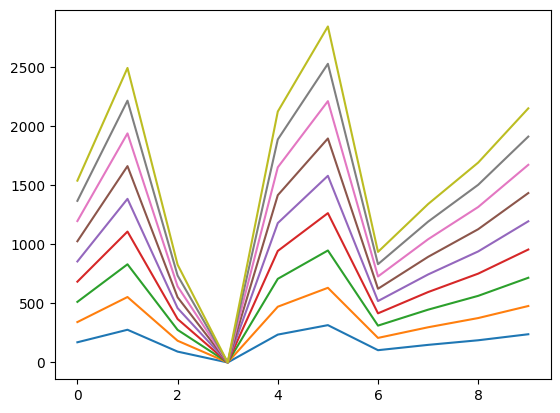

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction pour estimer les coefficients de passage selon la méthode de Chain-Ladder
def estimate_chain_ladder_factors(triangle_cumule):
    n = triangle_cumule.shape[1]
    factors = np.zeros(n - 1)
    
    for j in range(n - 1):
        factors[j] = np.sum(triangle_cumule[0:(n - j-1), j + 1]) / np.sum(triangle_cumule[0:(n - j-1), j])
    #print(factors)
    return factors

# Fonction pour obtenir le triangle inférieur des paiements futurs estimés à partir des coefficients de passage
def calculate_future_payments(triangle_cumule, factors):
    n = triangle_cumule.shape[1]
    
    for j in range(n - 1):
        triangle_cumule[(n - j - 1):n, j + 1] = factors[j] * triangle_cumule[(n - j - 1):n, j]
    return triangle_cumule

# Fonction pour obtenir la provision selon la méthode de Chain-Ladder
def calculate_chain_ladder_reserve(triangle_cumule):
    n = triangle_cumule.shape[1]
    reserves = np.zeros(n)
    
    for i in range(n):
     
        reserves[i] = triangle_cumule[i, n - 1] - triangle_cumule[i, n - i-1]
    print(reserves)
    return np.sum(reserves)

# Exemple d'utilisation
# Supposez que "Triangle" est votre triangle de paiements
# Assurez-vous que Triangle est une matrice NumPy

Triangle = triangle_generated.to_numpy() # Remplacez les ellipses par vos données réelles

# Triangle des paiements cumulés à partir du triangle des paiements cumulés
triangle_cumule = np.zeros_like(Triangle)
triangle_cumule[:, 0] = Triangle[:, 0]

for j in range(1, Triangle.shape[1]):
    triangle_cumule[:, j] = Triangle[:, j] + triangle_cumule[:, j - 1]
#print(triangle_cumule)
# Estimation des coefficients de passage
f_hat = estimate_chain_ladder_factors(triangle_cumule)

# Obtention du triangle inférieur des paiements futurs estimés
C_hat = calculate_future_payments(triangle_cumule, f_hat)

# Obtention de la provision selon la méthode de Chain-Ladder
reserve = calculate_chain_ladder_reserve(C_hat)

print("Provision selon la méthode de Chain-Ladder:", reserve)
r=np.zeros((C_hat.shape[1]-1,C_hat.shape[1]-1))
for i in range(C_hat.shape[1]-1):
    for j in range(C_hat.shape[1]-1-i):
        r[j,i] = (C_hat[j,i+1]- f_hat[i]*C_hat[j,i])/np.sqrt(C_hat[j,i])
        
    plt.plot(np.arange(0,C_hat.shape[1],1),C_hat[:,i]-min(C_hat[:,i]))
plt.plot(r[0], r[1])

print("Les residus selon la méthode de Chain-Ladder:", sum(r))

Test d'indépedance entre les facteurs de développement/ Validation du modèle

In [8]:
"""C_hat
for i in range(C_hat.shape[1]-1):
      C_hat[:,C_hat.shape[1]-i-1]= C_hat[:,C_hat.shape[1]-i-1]- C_hat[:,C_hat.shape[1]-i-2]
C_hat"""

'C_hat\nfor i in range(C_hat.shape[1]-1):\n      C_hat[:,C_hat.shape[1]-i-1]= C_hat[:,C_hat.shape[1]-i-1]- C_hat[:,C_hat.shape[1]-i-2]\nC_hat'

In [9]:
Cc_hat = C_hat
for i in range(Cc_hat.shape[1]):
   for j in range(i):
      Cc_hat[i,Cc_hat.shape[1]-j-1]=0
Cc_hat

array([[ 9964., 19928., 29892., 39856., 49820., 59784., 69748., 79712.,
        89676., 99640.],
       [10070., 20140., 30210., 40280., 50350., 60420., 70490., 80560.,
        90630.,     0.],
       [ 9885., 19770., 29655., 39540., 49425., 59310., 69195., 79080.,
            0.,     0.],
       [ 9793., 19586., 29379., 39172., 48965., 58758., 68551.,     0.,
            0.,     0.],
       [10029., 20058., 30087., 40116., 50145., 60174.,     0.,     0.,
            0.,     0.],
       [10109., 20218., 30327., 40436., 50545.,     0.,     0.,     0.,
            0.,     0.],
       [ 9897., 19794., 29691., 39588.,     0.,     0.,     0.,     0.,
            0.,     0.],
       [ 9942., 19884., 29826.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.],
       [ 9981., 19962.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.],
       [10032.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.]])

In [28]:
from  sklearn import linear_model

coeff=np.zeros(Cc_hat.shape[1]-1)
cont=np.zeros(Cc_hat.shape[1]-1)
for i in range(Cc_hat.shape[1]-1):
    x=np.array(Cc_hat[i,0:Cc_hat.shape[1]-1]).T
    #print("***")
    #print(x)
    y=Cc_hat[i+1,0:Cc_hat.shape[1]-1].T
    #print("***")
    #print(y)
    x= x.reshape(-1,1)
    y=y.reshape(-1,1)
    reg=linear_model.LinearRegression()
    reg.fit(x,y)
   # print(reg.coef_,reg.intercept_)
    for j in range(i+1):
      Cc_hat[Cc_hat.shape[1]-j-1,i]=reg.coef_*Cc_hat[Cc_hat.shape[1]-j-1,i-1]+  reg.intercept_
    #print(Cc_hat[:,i])


In [27]:
import scipy.stats as si
for i in range(Cc_hat.shape[1]-1):
    x=Cc_hat[i,0:Cc_hat.shape[1]-1-i]
    y=Cc_hat[i+1,0:Cc_hat.shape[1]-1-i]
   # print(x,y)
    reg=si.linregress(x,y)
    slope, intercept , r_value, p_value, std_err= si.linregress(x, y)



c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_mstats_common.py:181: RuntimeWarning: invalid value encountered in double_scalars
  slope = ssxym / ssxm
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_mstats_common.py:195: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_mstats_common.py:198: RuntimeWarning: invalid value encountered in double_scalars
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


In [12]:
import numpy as np

def london_chain_method(C):
    n = C.shape[0]
    m = C.shape[1] - 1  # Nombre d'années de développement

    # Initialiser les estimateurs
    lambda_hat = np.zeros(m)
    alpha_hat = np.zeros(m)

    for j in range(m):
        # Construire la matrice de conception X et le vecteur cible y
        X = np.column_stack([np.ones(n-j-1), C[:-j-1, j]])
        y = C[j+1:, j+1]

        # Calculer les estimateurs par MCO
        beta_hat = np.linalg.lstsq(X, y, rcond=None)[0]

        # Mettre à jour les estimateurs
        alpha_hat[j] = beta_hat[0]
        lambda_hat[j] = beta_hat[1]

    return lambda_hat, alpha_hat

# Exemple d'utilisation
# Supposons que Cc_hat est votre matrice de développement de sinistres
# Assurez-vous que Cc_hat a la forme (nombre d'années, nombre de périodes)
Co_hat = np.array([[100, 120, 150],
                   [80, 100, 120],
                   [60, 80, 90],
                   [40, 60, 70]])

lambda_hat, alpha_hat = london_chain_method(C_hat)

# Afficher les résultats
print("Estimateurs de lambda:", lambda_hat)
print("Estimateurs de alpha:", alpha_hat)


Estimateurs de lambda: [-1.19972314 -5.33375104 -0.08773678  1.52700284  0.96353408  0.12400446
  0.21577462 -0.30280563  0.        ]
Estimateurs de alpha: [ 32276.46976626 133133.3851708   31228.49228236 -38213.77749887
 -34648.73269089   2880.96450666  -4423.9431917   33106.45481598
     -0.        ]


In [13]:
C_hat

array([[9.96400000e+03, 1.99280000e+04, 2.98920000e+04, 3.98560000e+04,
        4.98200000e+04, 5.97840000e+04, 6.97480000e+04, 7.97120000e+04,
        8.96760000e+04, 9.96400000e+04],
       [1.00700000e+04, 2.01400000e+04, 3.02100000e+04, 4.02800000e+04,
        5.03500000e+04, 6.04200000e+04, 7.04900000e+04, 8.05600000e+04,
        7.55238687e+04, 0.00000000e+00],
       [9.88500000e+03, 1.97700000e+04, 2.96550000e+04, 3.95400000e+04,
        4.94250000e+04, 5.93100000e+04, 6.91950000e+04, 7.62536938e+04,
        7.14144704e+04, 0.00000000e+00],
       [9.79300000e+03, 1.95860000e+04, 2.93790000e+04, 3.91720000e+04,
        4.89650000e+04, 5.87580000e+04, 4.75032871e+04, 5.22063028e+04,
        4.84666580e+04, 0.00000000e+00],
       [1.00290000e+04, 2.00580000e+04, 3.00870000e+04, 4.01160000e+04,
        5.01450000e+04, 3.65407509e+04, 2.98480845e+04, 3.26337793e+04,
        2.97890976e+04, 0.00000000e+00],
       [1.01090000e+04, 2.02180000e+04, 3.03270000e+04, 4.04360000e+04,
   

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Génération de données simulées pour illustration
np.random.seed(42)
data = pd.DataFrame(np.random.rand(5, 5), columns=['C_1', 'C_2', 'C_3', 'C_4', 'C_5'])
# Fonction pour estimer les paramètres du modèle de Mack
def mack_model(data):
    num_years = data.shape[1]

    lambda_j_hat = np.zeros(num_years - 1)
    sigma_sq_j_hat = np.zeros(num_years - 1)

    for j in range(num_years - 2):
        # Calcul des estimateurs lambda_j_hat et sigma_sq_j_hat
        X = np.arange(1, num_years - j)
        Y = data.iloc[0:num_years -j- 1, j + 1].values.flatten()
        print(X,Y)
        X = sm.add_constant(X)
        model = sm.OLS(Y, X)
        results = model.fit()

        lambda_j_hat[j] = results.params[1]
        sigma_sq_j_hat[j] = results.scale

    return lambda_j_hat, sigma_sq_j_hat

# Estimation des paramètres du modèle de Mack
lambda_j_hat, sigma_sq_j_hat = mack_model(data)

# Affichage des résultats
print("Estimations de lambda_j_hat :", lambda_j_hat)
print("Estimations de sigma_sq_j_hat :", sigma_sq_j_hat)


[1 2 3 4] [0.95071431 0.05808361 0.96990985 0.30424224]
[1 2 3] [0.73199394 0.86617615 0.83244264]
[1 2] [0.59865848 0.60111501]
Estimations de lambda_j_hat : [-0.102759    0.05022435  0.00245653  0.        ]
Estimations de sigma_sq_j_hat : [0.29237881 0.00469928        inf 0.        ]


c:\Users\hp\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [25]:
import pandas as pd
from io import StringIO

# Vos données tabulaires
data_str = """
	1	2	3	4
2010	 24 072 565   	 26 727 291   	 26 858 199   	 26 867 829   
2011	 25 860 260   	 28 426 656   	 28 527 151   	28537378.87
2012	 25 973 547   	 28 545 770   	28665536.45	28675814.11
2013	 16 190 244   	 17 852 504   	17927405.78	17933833.42
"""

# Lecture des données dans un DataFrame
df = pd.read_csv(StringIO(data_str), delimiter='\t', index_col=0, thousands=' ')

# Affichage du DataFrame
print(df)


             1         2            3            4
2010  24072565  26727291  26858199.00  26867829.00
2011  25860260  28426656  28527151.00  28537378.87
2012  25973547  28545770  28665536.45  28675814.11
2013  16190244  17852504  17927405.78  17933833.42


In [55]:
import numpy as np
from scipy.optimize import minimize

ff_hat = estimate_chain_ladder_factors(df.to_numpy())
lambda_hat=ff_hat
#data=pd.DataFrame(C_hat)
data=df

def sigma_estimator(lambda_hat, data):
    num_years = data.shape[1]
    sigma_sq_hat = np.zeros(num_years - 1)
    for i in range( num_years -2):
        sigma_sq_hat[i] = np.sum(data.iloc[:, i ]*((data.iloc[:, i + 1] / data.iloc[:, i ] - lambda_hat[i])**2)) / (num_years - i - 1)
    sigma_sq_hat[num_years -2] = np.min([sigma_sq_hat[num_years - 3]**2 / sigma_sq_hat[num_years - 4], sigma_sq_hat[num_years - 3], sigma_sq_hat[num_years - 4]])
    return sigma_sq_hat

def msep_estimator(lambda_hat, sigma_sq_hat, data):
    num_years = data.shape[1]
    msep_hat = np.zeros(num_years - 1)

    for i in range( num_years-2):
        for j in range(num_years - i):
            msep_hat[i +1] += (data.iloc[j, i + 1]**2) * (sigma_sq_hat[i] / lambda_hat[i]**2) * (1/data.iloc[j, i] + 1 / np.sum(data.iloc[j:, i]))

        msep_hat[i+1] += data.iloc[i, num_years - 1] * np.sum(data.iloc[i+1:, num_years - 1]) * np.sum([2 * sigma_sq_hat[i] / (lambda_hat[i]**2 * np.sum(data.iloc[:num_years - j, j])) for j in range(num_years - i )])

    return msep_hat

sigma_sq=sigma_estimator(lambda_hat,data)
type(sigma_sq)
msep_hat = msep_estimator(lambda_hat, sigma_sq, data)
msep_hat


array([0.00000000e+00, 2.72013212e+11, 2.90178555e+09])

In [60]:
ff_hat
sigma_sq
msep_hat[2]+msep_hat[1]

274914997767.66846